In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
sns.set()

np.random.seed(5)

In [2]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Cоздание синтезатора, генерирующего workers_num комбинаций рандомных параметров, для каждой из которых создает по генератору временного ряда.
# Параметры для генератора включают: ar1, ma1, ma2 - коэффициенты для ARIMA(1, 0, 2); trend_coef - коэффициент линейного тренда 
# Плюс добавляется нормальный шум N(0,1) и опционально сезонность (но я её отключил пока)
synt = Synthesizer(workers_num=4, random_seed=27)

In [4]:
# Создание генератора данных, способного склеивать разнородные временные ряды в один путем подсчета средних на концах
# В данном случае источник рядов - наш синтезатор
gen = Generator(synt)

# Получение итогового временного ряда путем получения от синтезатора pieces_num временных рядов 
# произвольного размера из [lower_bound, upper_bound) и их последующей склейки
gen.generate(pieces_num=10, lower_bound=40, upper_bound=80)

In [5]:
# gen.show_time_series()

In [6]:
algo = Algorithm(gen, total_time=300, period=2)
algo.run()

/Users/sergeykb/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sergeykb/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/sergeykb/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


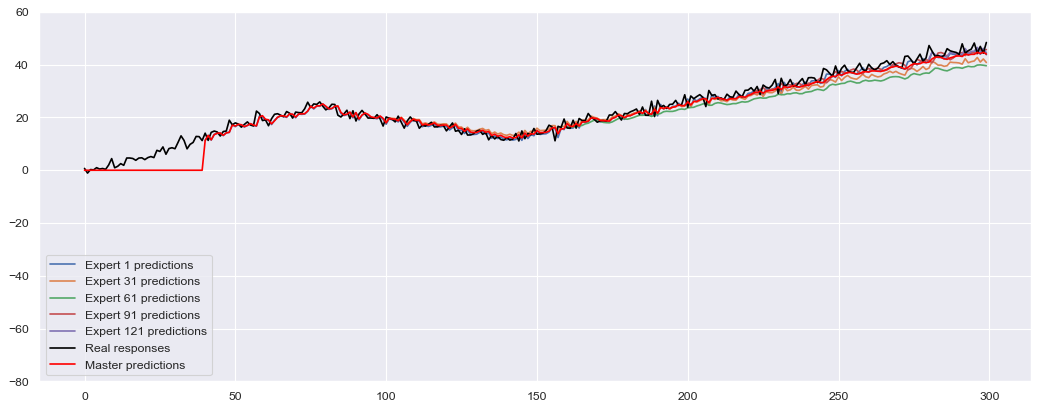

In [7]:
plt.figure(figsize=(16, 6))
for i, p in enumerate(algo.init_points):
    # plt.axvline(p, color='grey', linestyle='--')
    if i % 30 == 0:
        plt.plot(np.arange(gen.curr_time)[algo.init_points[i]:], algo.experts_predictions_all.T[i][algo.init_points[i]:], label=f"Expert {i+1} predictions")
plt.plot(np.arange(gen.curr_time), algo.responses, label="Real responses", color='black')
plt.plot(np.arange(gen.curr_time), algo.master_predictions_all, label="Master predictions", color='red')
plt.ylim(-80, 60)
plt.legend()